In [14]:
# Clone the GitHub repository
!git clone https://github.com/Erum-hub/LHL_LLM.git

# Change directory to the cloned repository
%cd LHL_LLM

Cloning into 'LHL_LLM'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 12), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 14.84 KiB | 2.47 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/LHL_LLM


In [15]:
import pandas as pd
import re

In [18]:
import csv

# Open and read the CSV file
with open('/content/LHL_LLM/Customer_Reviews.csv', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)

    # Read the header
    headers = next(reader)
    print("Headers:", headers)

Headers: ['', 'book name', 'review title', 'reviewer', 'reviewer rating', 'review description', 'is_verified', 'date', 'timestamp', 'ASIN', 'Author']


In [20]:
# Load dataset
df = pd.read_csv('/content/LHL_LLM/Customer_Reviews.csv')

In [21]:
# Inspect
print(df.head())

   Unnamed: 0                                          book name  \
0          17  Friends, Lovers, and the Big Terrible Thing: A...   
1         131                      Lessons in Chemistry: A Novel   
2         464                           Flash Cards: Sight Words   
3         644  A Court of Mist and Fury (A Court of Thorns an...   
4          78  The Ballad of Songbirds and Snakes (A Hunger G...   

                                        review title          reviewer  \
0                                    A very sad read  Veronica R Ewing   
1                    I LOVE THIS BOOK!! 😍 ⭐️⭐️⭐️⭐️⭐️             Sonia   
2                     Amazing for struggling readers     Ryan Williams   
3  The ending was stunning, as always, but I had ...          Brittany   
4                                         So Good!!!   Kindle Customer   

   reviewer rating                                 review description  \
0                4  What a shock to lose such a talented and funny...   


In [35]:
# Count unique values in the 'review title' column
unique_count = df['review title'].nunique()
print(f"Number of unique review titles: {unique_count}")

Number of unique review titles: 811


In [36]:
top_titles = df['review title'].value_counts().head(10)
print(top_titles)


review title
Great book           14
Cute book            10
Book                  6
Cute                  5
Great                 4
Love it               4
Great book!           4
Nice                  3
Perfect               3
Such a cute book!     3
Name: count, dtype: int64


In [37]:
top_title_list = top_titles.index.tolist()
df['title_group'] = df['review title'].apply(lambda x: x if x in top_title_list else 'Other')


In [27]:
# Combine review title and description
df['text'] = df['review title'].fillna('') + '. ' + df['review description'].fillna('')

# Clean text
def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", str(text))
    return text.lower().strip()

df['clean_text'] = df['text'].apply(clean_text)






In [32]:
# Save cleaned data
df[['clean_text', 'label']].dropna().to_csv('cleaned_reviews.csv', index=False)

In [33]:
# View the first few rows and header of the cleaned CSV
df_cleaned = pd.read_csv('cleaned_reviews.csv')
print("\nCleaned Reviews Header and first few rows:")
print(df_cleaned.head())


Cleaned Reviews Header and first few rows:
                                          clean_text  label
0  a very sad read what a shock to lose such a ta...      1
1  i love this book   oh my god i love this book ...      1
2  amazing for struggling readers i bought these ...      1
3  the ending was stunning as always but i had ch...      1
4  so good if you loved the hunger games you have...      1


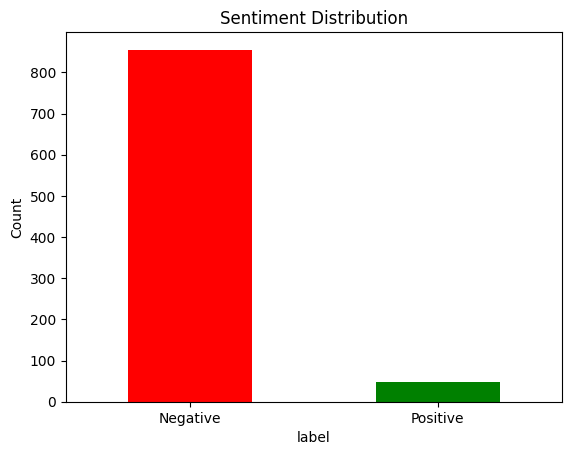

In [34]:
import matplotlib.pyplot as plt

df_cleaned['label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.show()
